# Image Classification with the MNIST Dataset

Using Keras to build a NN model

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
# the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

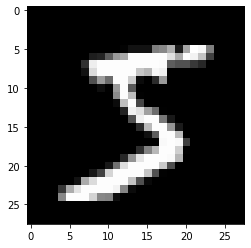

In [6]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

In [7]:
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

In [8]:
x_train = x_train / 255
x_valid = x_valid / 255 

In [9]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [10]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [11]:
from tensorflow.keras.layers import Dense

In [12]:
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

In [13]:
model.add(Dense(units = 512, activation='relu'))

In [14]:
model.add(Dense(units = 10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history=model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0369 - accuracy: 0.9932 - val_loss: 0.1804 - val_accuracy: 0.9801
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0335 - accuracy: 0.9939 - val_loss: 0.2795 - val_accuracy: 0.9790
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0319 - accuracy: 0.9943 - val_loss: 0.2867 - val_accuracy: 0.9800
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0311 - accuracy: 0.9949 - val_loss: 0.2749 - val_accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0269 - accuracy: 0.9955 - val_loss: 0.2987 - val_accuracy: 0.9793


In [20]:
score = model.evaluate(x_valid,y_valid)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.2987 - accuracy: 0.9793: 0s - loss: 0
Test score: 0.29869118332862854
Test accuracy: 0.9793000221252441


Adding convolution and maxpooling layers

In [21]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers.normalization import BatchNormalization

In [22]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [23]:
X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [25]:
import keras.utils as np_utils
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [31]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)       

In [33]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [35]:
train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)


In [36]:
model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1, 
                    validation_data=test_generator, validation_steps=10000//128)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
468/468 [==============================] - 126s 269ms/step - loss: 0.1310 - accuracy: 0.9594 - val_loss: 0.0835 - val_accuracy: 0.9736
Epoch 2/5
468/468 [==============================] - 127s 272ms/step - loss: 0.0501 - accuracy: 0.9848 - val_loss: 0.0456 - val_accuracy: 0.9857
Epoch 3/5
468/468 [==============================] - 130s 278ms/step - loss: 0.0408 - accuracy: 0.9873 - val_loss: 0.0375 - val_accuracy: 0.9877
Epoch 4/5
468/468 [==============================] - 130s 278ms/step - loss: 0.0338 - accuracy: 0.9895 - val_loss: 0.0282 - val_accuracy: 0.9918
Epoch 5/5
468/468 [==============================] - 129s 276ms/step - loss: 0.0307 - accuracy: 0.9903 - val_loss: 0.0202 - val_accuracy: 0.9925


In [38]:
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.020143020898103714
Test accuracy: 0.9925000071525574
